In [1]:
import numpy
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Edge Detection First

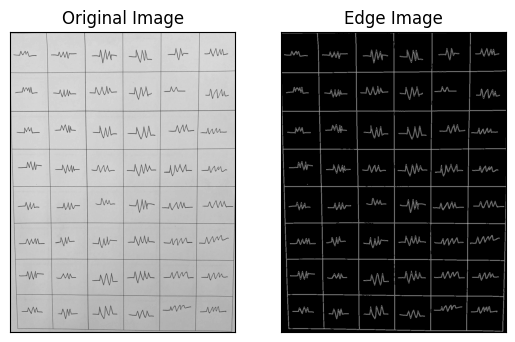

In [2]:
img = cv.imread('TestImagesResistors.jpeg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)
 
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

# Cropping the Images

In [3]:
img = cv.imread('TestImagesResistors.jpeg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
crop_image = img[10:150, 0:150]
print(img.shape)
cv.imshow("Cropped", crop_image)
cv.imwrite("Test.jpg", crop_image)


(1280, 961)


True

In [14]:
width = 150
height = 150 
offset = 20
loopW = np.linspace(0, 961, 6, dtype=int)
loopH = np.linspace(0, 1280, 8, dtype=int)
cnt = 0
for i in range(len(loopH)-1):
    crop_image = img[loopH[i]: loopH[i+1], 0:192]
    cv.imshow("Cropped", crop_image)
    outfile = "Test"+ str(cnt) + ".jpg" 
    cv.imwrite(outfile, crop_image)
    cnt = cnt +1

In [15]:
print(loopH)

[   0  182  365  548  731  914 1097 1280]
